# Q2 Text Mining --> Amazon 

1) Extract reviews of any product from ecommerce website like amazon  
2) Perform emotion mining

# 1. Import libs

In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from flask import Response
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 2. Import Data

#### Connecting to Amazon.in to download reviews

In [30]:
iphone_review=[]

In [31]:
for i in range(1,100):
    op= []
    url = "https://www.amazon.in/Apple-iPhone-14-128GB-Blue/product-reviews/B0BDK62PDX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    responce = requests.get(url)
    soup = bs(responce.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone_review = iphone_review+op


#### Downloading review from Amazon.in

In [32]:
iphone_review = list(set(iphone_review))
iphone_review

['\nValue for Money @80k The most important thing is that i like the cinematic mode in iphone 14 which is fabulous and batter backup.\n',
 '\nI like iphone sound quality but camera is ok ok zoom level is low ……battery life also superb and after one time charge it will continue for 2 days and fast charging…worth to buy it\n',
 '\nI want to return it ASAP\n',
 '\nProduct feel & experience is good and excellent in use.\n',
 '\nAbout the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app

# 3. Data Preprocessing

#### remove both the leading and the trailing characters

In [33]:
iphone_review=[Text.strip() for Text in iphone_review] 
iphone_review=[Text for Text in iphone_review if Text] # removes empty strings.
iphone_review[0:10]

['Value for Money @80k The most important thing is that i like the cinematic mode in iphone 14 which is fabulous and batter backup.',
 'I like iphone sound quality but camera is ok ok zoom level is low ……battery life also superb and after one time charge it will continue for 2 days and fast charging…worth to buy it',
 'I want to return it ASAP',
 'Product feel & experience is good and excellent in use.',
 'About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app store. If you are

#### Joining the list into one string/text

In [34]:
txt_upd = ' '.join(iphone_review)
txt_upd

'Value for Money @80k The most important thing is that i like the cinematic mode in iphone 14 which is fabulous and batter backup. I like iphone sound quality but camera is ok ok zoom level is low ……battery life also superb and after one time charge it will continue for 2 days and fast charging…worth to buy it I want to return it ASAP Product feel & experience is good and excellent in use. About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience the features, physical components , camera lens etc. Apart from basic things, you can also enjoy the best applications available in app store. If you are a developer you 

In [35]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink
txt_upd

'value for money k the most important thing is that i like the cinematic mode in iphone which is fabulous and batter backup i like iphone sound quality but camera is ok ok zoom level is low battery life also superb and after one time charge it will continue for days and fast charging worth to buy it i want to return it asap product feel experience is good and excellent in use about the phoneapple phone without a second delay i would say it is better than all android phones i have used the phone is like water it flows in a way you want and shaping in your way in a best way possible the phone is designed to only show what the user wants and eliminating unnecessary ads features that i have seen in android why it is better than android you pay too much money for apple products obviously you experience the features physical components camera lens etc apart from basic things you can also enjoy the best applications available in app store if you are a developer you might know the app store po

In [36]:
text_tokens = word_tokenize(txt_upd)

In [37]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [38]:
tf = TfidfVectorizer()

In [39]:
text_tf = tf.fit_transform(tokens_without_sw)

#### Create the DataFrame

In [40]:
feature_names = tf.get_feature_names_out ()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [41]:
df

,activity,added,additional,ads,amazon,android,app,apple,application,applications,...,value,visually,vs,waiting,wanted,waste,water,whichwas,worth,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
word_list = ' '.join(df)

In [43]:
wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(word_list)

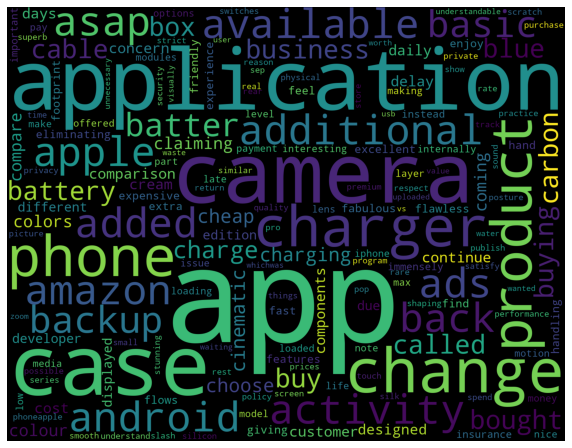

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 4. Sentimental Analysis

In [45]:
with open('positive-words.txt') as pw:
    positive_words = pw.read().split("\n")

In [46]:
positive_words = positive_words[35:]
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [47]:
with open('negative-words.txt') as nw:
    negative_words = nw.read().split("\n")

In [48]:
negative_words = negative_words[35:]
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [49]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [50]:
wordcloud_pos = WordCloud(background_color='black',width=1800,height=1400).generate(txt_pos_in_pw)

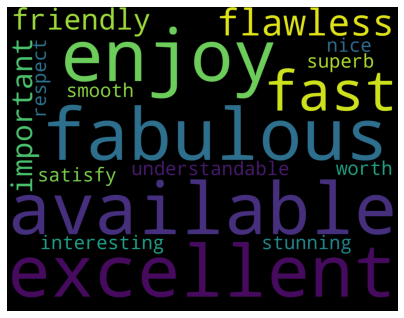

In [51]:
plt.figure(figsize=(7,15))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

In [52]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [53]:
wordcloud_neg = WordCloud( background_color='black',width=1800,height=1400).generate(txt_neg_in_nw)

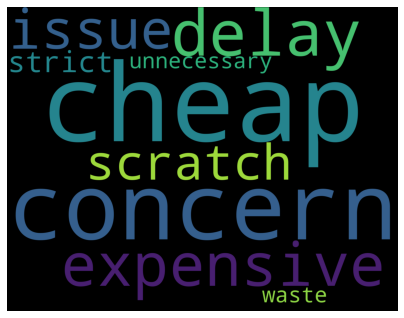

In [54]:
plt.figure(figsize=(7,15))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

# END